In [3]:
#two methods: one using sklearn
#two using pycaret automl which based on sklearn

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn import feature_extraction, feature_selection
from sklearn import gaussian_process , neighbors
%matplotlib inline

In [4]:
%pwd

'C:\\Users\\drang'

In [5]:
#data1 = pd.read_excel(r"C:\Users\drang\Downloads\misc\cyclonedata.xlsx", skiprows=lambda x: x*0 !=0)
#i saved the csv file after converting all dtypes and removing bad data of nearly 1500 rows

In [34]:
import pandas as pd
dfs= pd.read_csv(r"C:\Users\drang\treatedcyclonedatafinal.csv")

In [5]:
#-----
df = data1
df['time'] = pd.to_datetime(df['time'])

In [3]:
'''pip3 install jupyter-tabnine
jupyter nbextension install --py jupyter_tabnine
jupyter nbextension enable --py jupyter_tabnine
jupyter serverextension enable --py jupyter_tabnine'''
data1

In [9]:
#concat time and treated data
dfs = pd.concat([dfs,df['time']],axis=1)

In [39]:
dfs=dfs.dropna()
dfs.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [35]:
#df.describe() 377719 rows × 7 columns
dfs.dropna(axis=1, inplace=True)
dfs.columns

Index(['Unnamed: 0', 'index', 'time', 'Cyclone_Inlet_Gas_Temp',
       'Cyclone_Material_Temp', 'Cyclone_Outlet_Gas_draft',
       'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV


# FEW BAD DATA HANDLING

dfn= pd.DataFrame(columns = df.columns)
import numpy as np

dfn['time']=df['time']
df = df.drop(['time'], axis=1)
'''#print(df[j].isnull().sum())
        #df[i] = data[i].to_numeric() '''
for j in df.columns:

    for i in range(df[j].size):
            try:
                
                df[j][i]= df[j][i].str.astype(np.float32)
                

            except:
                df[j][i] = np.nan 
   
        #dfn[i] = MinMaxScaler.fit_transform(X=df[i])

import numpy as np

def convdtype(df):
    
    for j in df.columns:
         for i in range(0,df[j].size):
                if df[j][i]*0 ==0:
                        df[j][i] = np.float16(df[j][i])
                
                else:
                        df[j][i] = np.nan 
                    
                    #df[j]= df[j].astype(np.float)
    return df
    

df1= df.drop('time', axis=1)
#df1 = pd.DataFrame(columns = dfs.columns)
df2 = convdtype(df1)
#df2 = df2.dropna()
#type(df2['Cyclone_Inlet_Gas_Temp'].dtype)

    import multiprocessing
    
    p1 = multiprocessing.Process(target=convdtype, args= df[:130000])
    p2 = multiprocessing.Process(target=convdtype, args=df[130000:250000])
    p3 = multiprocessing.Process(target=convdtype, args=df[250000:])
    # starting process 1
    p1.start()
    # starting process 2
    p2.start()
    p3.start()
    # wait until process 1 is finished
    p1.join()
    # wait until process 2 is finished
    p2.join()
    p3.join()
    # both processes finished
    print("Done!")

df3 =  pd.DataFrame(columns=df.columns)
#df = df.drop('time', axis=1)
zzz= []
zz=[]
for i in np.nditer(df.to_numpy(), flags=['refs_ok', 'multi_index'], op_flags=['readwrite']):
    try: 
        zz.append(np.where(float(x)))
    except:
        zzz.append(np.where(x))
    #print(zz)

In [15]:
# for fast handling bad data
data=data1
df3 =  pd.DataFrame(columns=df.columns)
df = data.drop('time', axis=1)
zzz= []
zz=[]
for row, j in df.iterrows():
    for col, i in j.items():
        if type(i)!=float and type(i)!=int:   #i*0!=0 and:
            zzz.append([row,col])
            #print(j[1],i)

In [16]:
[25594, 'Cyclone_Inlet_Draft'] in zzz
# data 

True

In [17]:
dz = data
c= 0
for x, y in iter(zzz):
    c+=1
    dz[y][x] = np.nan
print(c) #9550

C:\Users\drang\AppData\Local\Temp\ipykernel_15964\1322283929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz[y][x] = np.nan


8195


In [28]:
dz.reset_index(inplace=True)
dz.tail()

,index,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
376119,377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
376120,377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
376121,377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
376122,377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96
376123,377718,2020-08-07 12:15:00,880.86,905.31,-235.02,-219.44,882.1,-184.02


In [37]:
type(dfs['Cyclone_Gas_Outlet_Temp'][52])
dz = dfs
dz.isnull().sum()

Unnamed: 0                  0
index                       0
time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [38]:
#dz.to_csv("treatedcyclonedata.csv")
dz.dropna(inplace=True, axis=0)
dz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376124 entries, 0 to 376123
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                376124 non-null  int64  
 1   index                     376124 non-null  float64
 2   time                      376124 non-null  object 
 3   Cyclone_Inlet_Gas_Temp    376124 non-null  float64
 4   Cyclone_Material_Temp     376124 non-null  float64
 5   Cyclone_Outlet_Gas_draft  376124 non-null  float64
 6   Cyclone_cone_draft        376124 non-null  float64
 7   Cyclone_Gas_Outlet_Temp   376124 non-null  float64
 8   Cyclone_Inlet_Draft       376124 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 25.8+ MB


In [17]:
dz.dtypes

time                         object
Cyclone_Inlet_Gas_Temp      float64
Cyclone_Material_Temp       float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Inlet_Draft         float64
dtype: object

In [32]:
float(dfs['Cyclone_Inlet_Draft'][100])
dz.loc[dz["Cyclone_Inlet_Draft"]=='Unit Down']
#type(data['Cyclone_Inlet_Draft'][25594])
#dz.head()

,index,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft


In [33]:
for i in dz.columns:
    if i!='time':
        dz[i]= dz[i].astype(np.float16)

In [39]:
dz.to_csv("treatedcyclonedatafinal.csv", index=True)

In [42]:
dz.drop('index', axis=1, inplace=True)
dz.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

# #  EDA


C:\Users\drang\AppData\Local\Temp\ipykernel_19068\4032454603.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(j, ax= axes[index])
C:\Users\drang\AppData\Local\Temp\ipykernel_19068\4032454603.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(j, ax= axes[index])
C:\Users\drang\AppData\Local\T

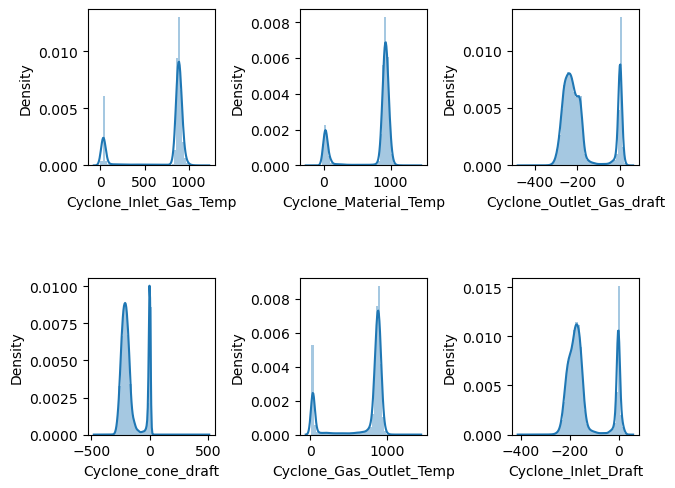

In [18]:
#EDA

cols = dz.columns[1:]
cols
fig, axs = plt.subplots(nrows=2, ncols=3)
axes = axs.flatten()
index=0
for i, j in dz[cols].items():
    sns.distplot(j, ax= axes[index])
    index+=1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

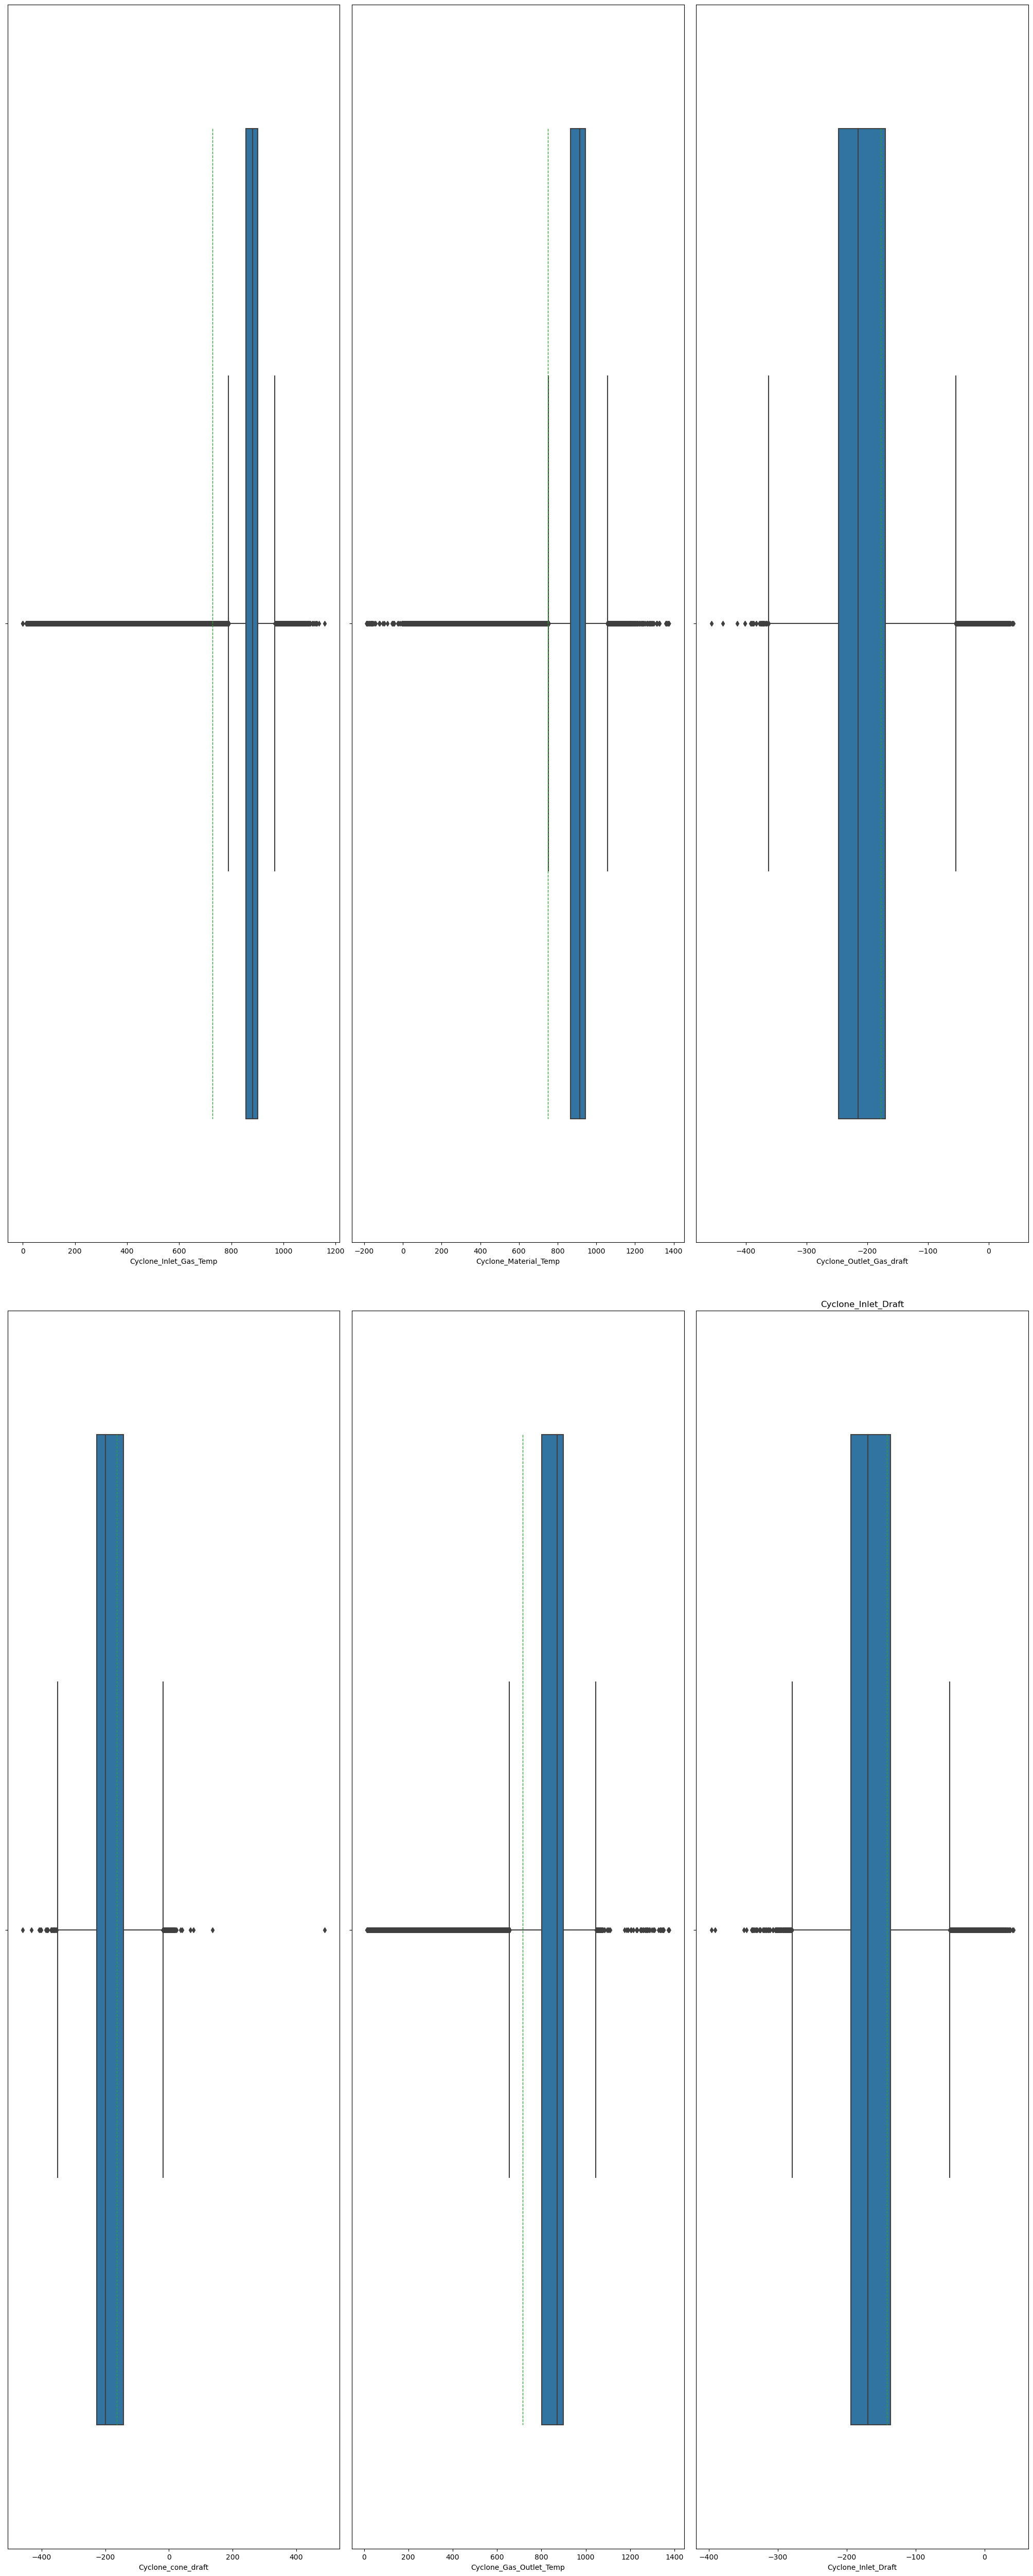

In [19]:

cols = dz.columns[1:]
cols
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,50))

axes = axs.flatten()
index=0

for i, j in dz[cols].items():
    sns.boxplot(x = j, showmeans= True, meanline = True, ax=axes[index], order=[min(j), max(j)])
    #axes[index].boxplot(x = j, showmeans = True, meanline = True)
    index+=1
    #print(i)
    plt.title(i)
   
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



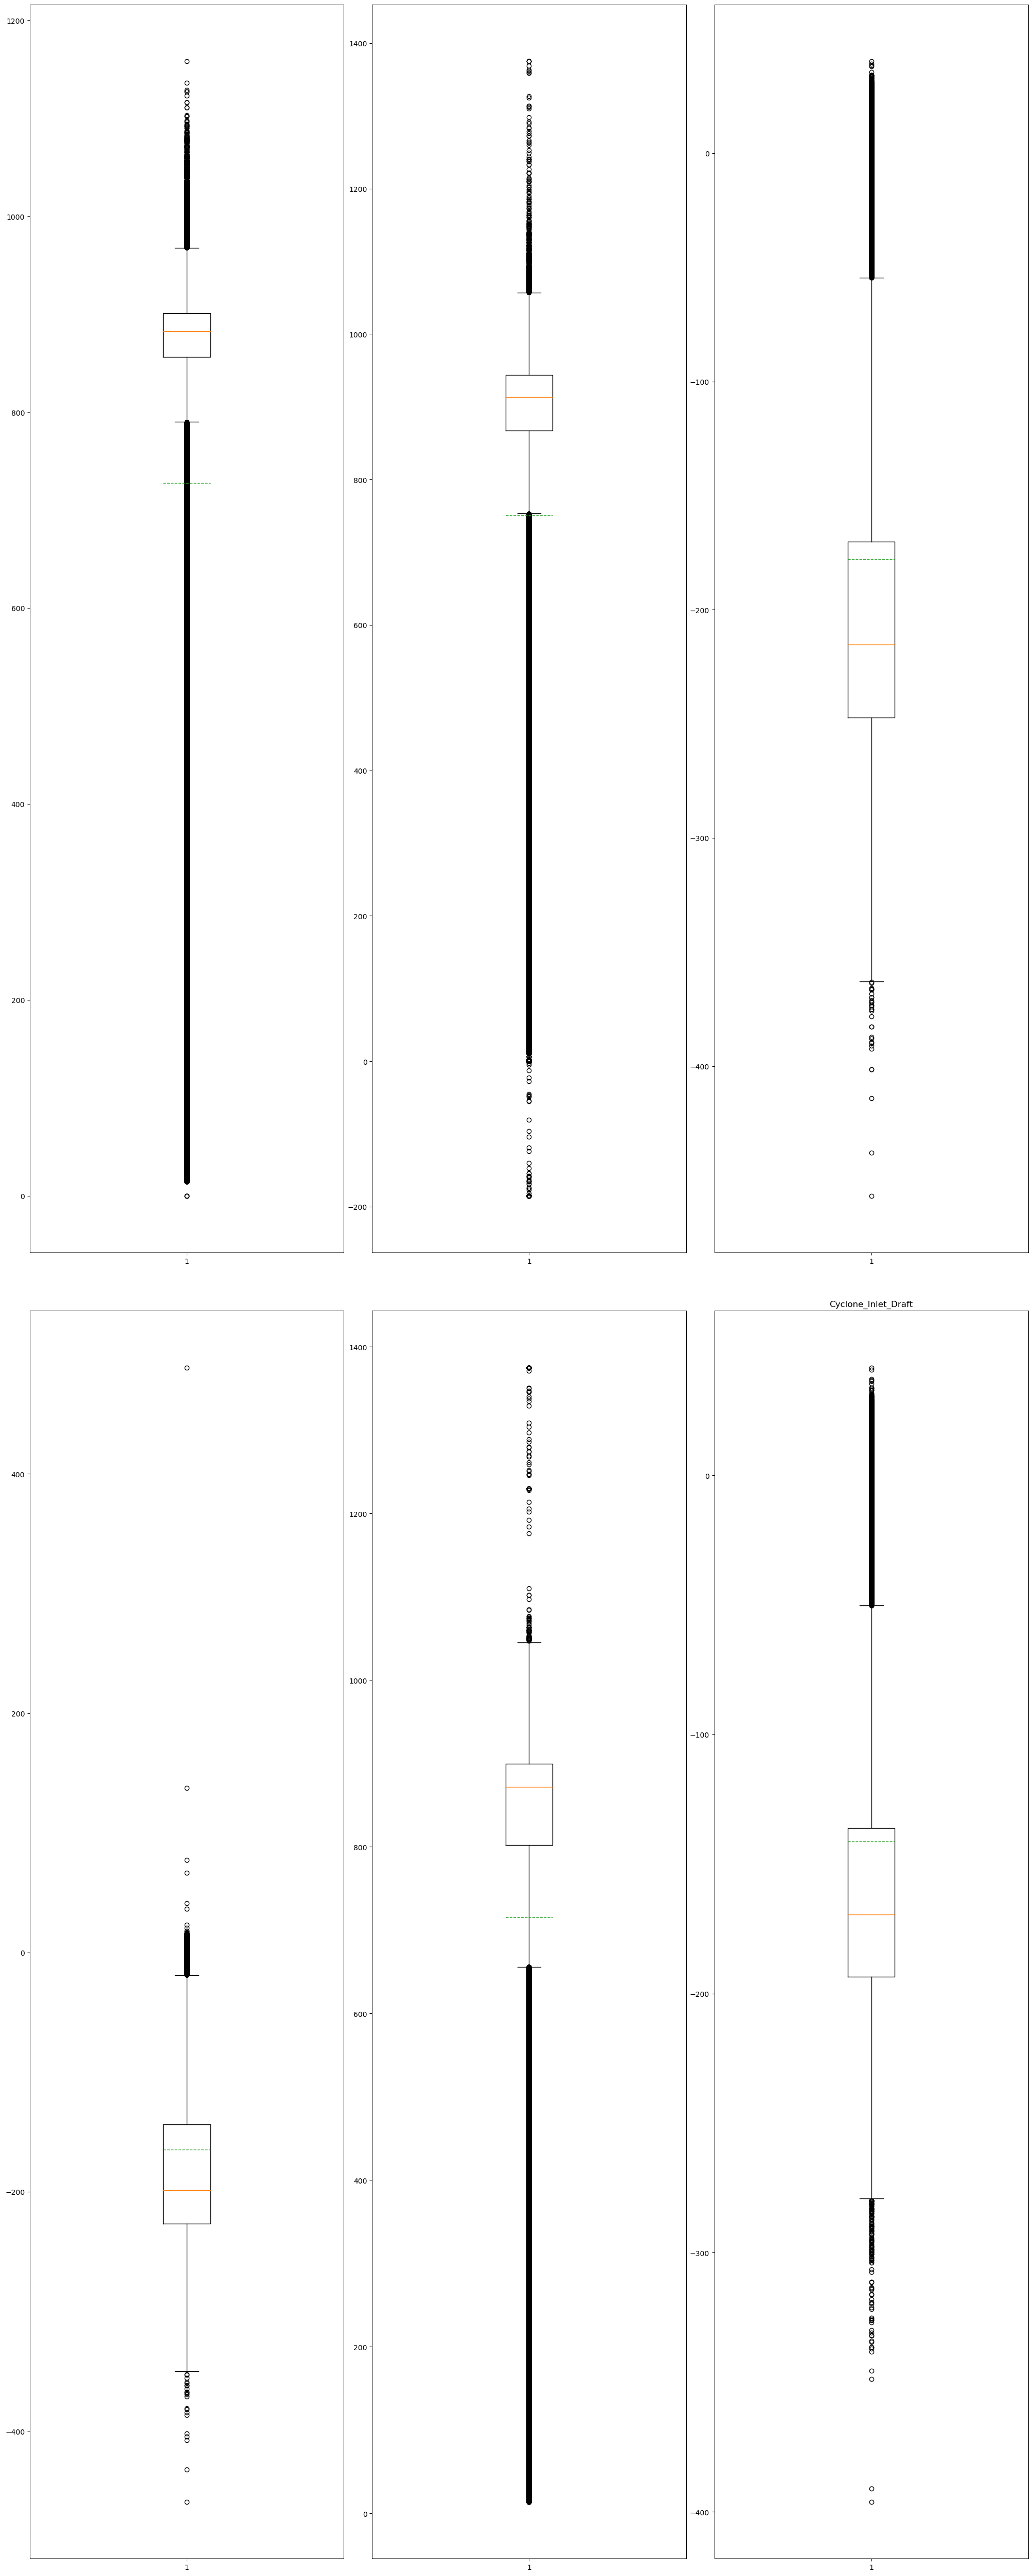

In [20]:
cols = dz.columns[1:]
cols
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,50))

axes = axs.flatten()
index=0

for i, j in dz[cols].items():
    #sns.boxplot(x = j, showmeans= True, meanline = True, ax=axes[index])
    axes[index].boxplot(x = j, showmeans = True, meanline = True)
    index+=1
    #print(i)
    plt.title(i)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


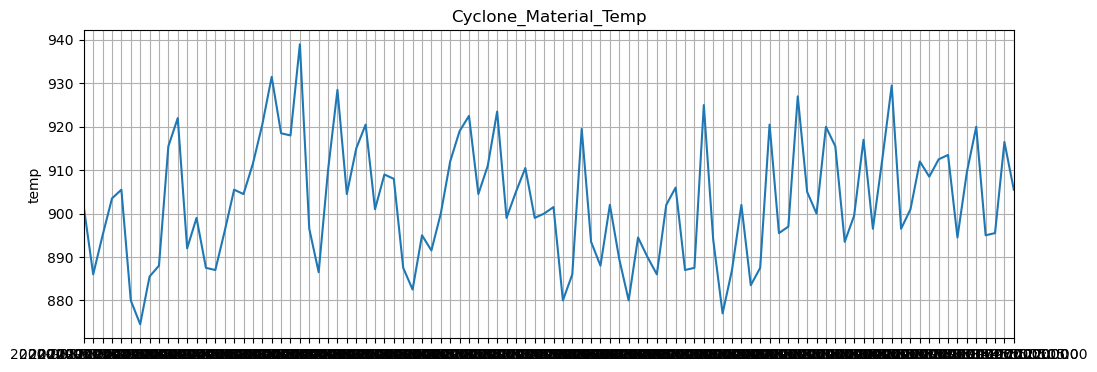

In [21]:
plt.figure(figsize=(12,4))
plt.title('Cyclone_Material_Temp')
plt.ylabel('temp')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(dz['time'][-100:], dz['Cyclone_Material_Temp'][-100:])

<Figure size 640x480 with 0 Axes>

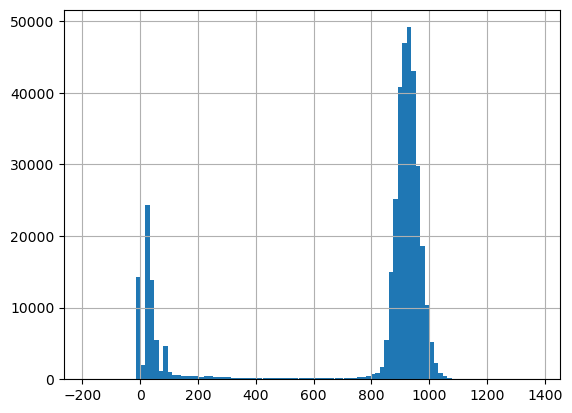

<Figure size 640x480 with 0 Axes>

In [47]:
dz["Cyclone_Material_Temp"].hist(bins=100);
plt.figure()


In [22]:
coln= ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']
dz.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

In [25]:
scle = MinMaxScaler()
dzn = scle.fit_transform(dz[coln])

In [26]:
dzn

array([[0.74913644, 0.70224359, 0.5377404 , 0.28818565, 0.61578302,
        0.57169613],
       [0.75906736, 0.70705128, 0.54800032, 0.29229958, 0.62349674,
        0.56278836],
       [0.75604491, 0.71089744, 0.55443792, 0.30875527, 0.62606798,
        0.57375177],
       ...,
       [0.76597582, 0.69262821, 0.45606341, 0.25801688, 0.64039347,
        0.49586588],
       [0.78454231, 0.70608974, 0.45324696, 0.25432489, 0.6554536 ,
        0.48924215],
       [0.76079447, 0.69903846, 0.44620584, 0.2528481 , 0.63782223,
        0.48467407]])

In [27]:
dzns = pd.DataFrame(data=dzn , columns=coln)

In [28]:
dzns.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000
mean,0.628142,0.599890,0.561216,0.310778,0.515724,0.582180
std,0.283795,0.224951,0.199442,0.095038,0.238991,0.177264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.739637,0.674679,0.421663,0.245148,0.579051,0.462976
50%,0.762090,0.704167,0.486038,0.274895,0.630109,0.517793
75%,0.778066,0.723397,0.576768,0.332911,0.650678,0.593851
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=100, contamination=0.01)
a1= clf.fit_predict(dzns)


In [214]:
#counting outliers and thier index

aaa =[]
for i, j in enumerate(a1):
    if j==-1:
        aaa.append(i)

In [219]:
len(aa)# 8000 outlier by LOF, 53k by IForest

1983

In [56]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, warm_start=True)
a2=clf.fit_predict(dzns) 

In [57]:
(a2==0).any()
a2
dzns.columns

Index(['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

C:\Users\drang\anaconda3\envs\rnn\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


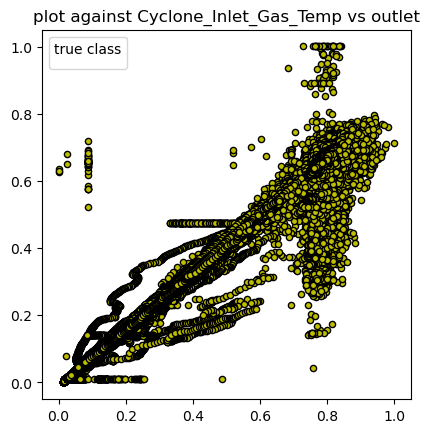

In [58]:
X = dzns.to_numpy()
scatter = plt.scatter(X[:, 0], X[:, 4], c='y', s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("plot against Cyclone_Inlet_Gas_Temp vs outlet")
plt.show()

C:\Users\drang\anaconda3\envs\rnn\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


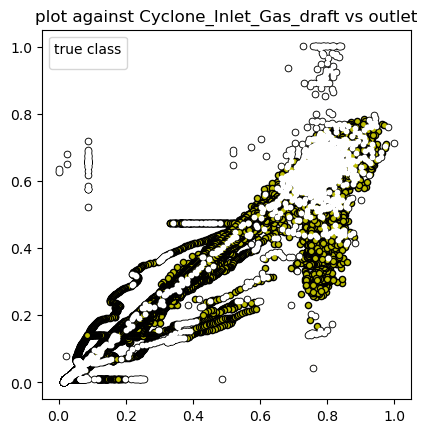

In [217]:
#LOF directly on full data norm outlier=3.7k
X = dzns.to_numpy()
scatter = plt.scatter(X[:, 0], X[:, 4], c='y', s=20, edgecolor="k")
plt.scatter(X[aaa,0],  X[aaa, 4], c='w', s=10)
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("plot against Cyclone_Inlet_Gas_temp vs outlet")
plt.show()

C:\Users\drang\anaconda3\envs\rnn\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


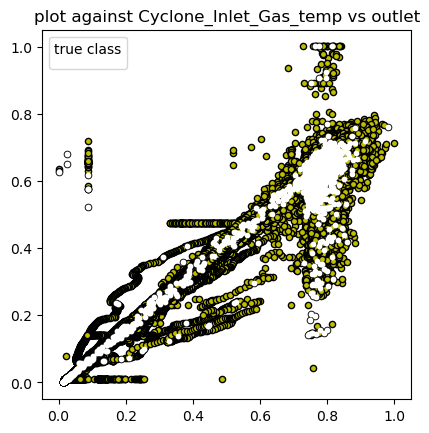

In [227]:
 # outlier found by LOF in PCA out =3k at contimanation = 0.01 GET aa FROM BELOW
X = dzns.to_numpy()
scatter = plt.scatter(X[:, 0], X[:, 4], c='y', s=20, edgecolor="k")
plt.scatter(X[aa,0],  X[aa, 4], c='w', s=10)
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("plot against Cyclone_Inlet_Gas_temp vs outlet")
plt.show()

In [30]:
num_test = 50000
X_train = dzns[:-num_test].values
X_test = dzns[-num_test:].values
X_train



array([[0.74913644, 0.70224359, 0.5377404 , 0.28818565, 0.61578302,
        0.57169613],
       [0.75906736, 0.70705128, 0.54800032, 0.29229958, 0.62349674,
        0.56278836],
       [0.75604491, 0.71089744, 0.55443792, 0.30875527, 0.62606798,
        0.57375177],
       ...,
       [0.79188256, 0.71762821, 0.31383278, 0.20432489, 0.66096341,
        0.35813805],
       [0.77158895, 0.70288462, 0.34260079, 0.21698312, 0.65324968,
        0.39125668],
       [0.7746114 , 0.70512821, 0.32047155, 0.22162447, 0.65214772,
        0.37549678]])

In [240]:
X_test.shape

(50000, 6)

In [62]:
from scipy.stats import multivariate_normal
p = multivariate_normal(mean=np.mean(X_train,axis=0), cov=np.cov(X_train.T))

x = p.pdf(X_train)
print("max prob of x on X_train", max(x))
print("mean prob of x on X_train", np.mean(x))
print('-' * 60)
MyTrain = np.mean(x)
len(x)

max prob of x on X_train 212569.87709438676
mean prob of x on X_train 48236.440842559525
------------------------------------------------------------


326124

In [63]:
from scipy.stats import multivariate_normal
p = multivariate_normal(mean=np.mean(X_test,axis=0), cov=np.cov(X_test.T))

x = p.pdf(X_test)
print("max prob of x on X_test", max(x))
print("mean prob of x on X_test", np.mean(x))
print('-' * 60)
MyTrain = np.mean(x)
#VALIDATING THE MEAN VALUE OF GAUSS DISTRI = NO SAMPLING ERR 5%= STAT SIGNIFICANT

max prob of x on X_test 216004.08111736187
mean prob of x on X_test 49400.836658054264
------------------------------------------------------------


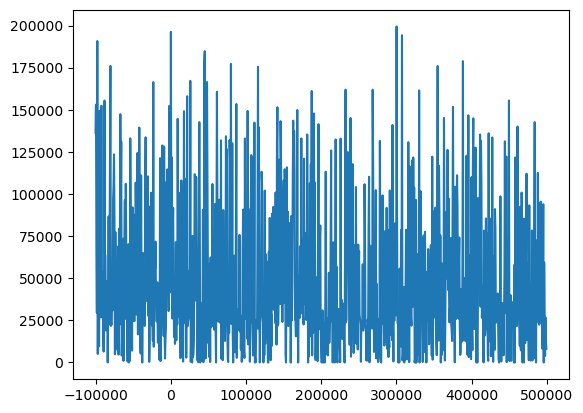

In [64]:
xx = np.linspace(-100000, 500000, 1000, endpoint=False)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(xx, x[:1000])
plt.show()

In [65]:
x

array([136318.5223289 , 153040.98728118,  72676.81329591, ...,
        78752.95663852, 154423.32226147, 173837.80087628])

# CAN ALSO TRY ROLLING MEAN TO CAPTURE HOURLY MEAN CORRELATIONS

In [66]:
#PCA fro VIZ
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
x3= pca.fit_transform(dzns)


<AxesSubplot:xlabel='1', ylabel='2'>

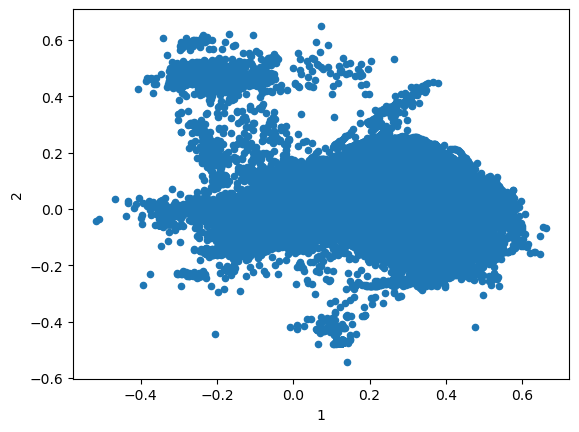

In [190]:
x3df = pd.DataFrame(x3)
x3df.plot.scatter(1,2) #feature 0 and 2 out of pca's 3 feature

In [114]:
x3.shape

(376124, 3)

# on pca

In [69]:
# on pca 
from scipy.stats import multivariate_normal
p = multivariate_normal(mean=np.mean(x3,axis=0), cov=np.cov(x3.T))

x = p.pdf(x3)
print("max prob of x on X_train", max(x))
print("mean prob of x on X_train", np.mean(x))
print('-' * 60)
MyTrain = np.mean(x)
len(x)

max prob of x on X_train 23.403907706810696
mean prob of x on X_train 12.411608676848855
------------------------------------------------------------


376124

In [191]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(x3[:, 1:])
a3=clf.predict(x3[:, 1:3])
a3

array([-1, -1, -1, ..., -1, -1, -1])

In [232]:
len(aa)

362728

In [224]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(contamination=0.01,novelty=True)
clf.fit(x3[:, 1:3])
a1= clf.predict(x3[:,1:3])


In [228]:
aa =[]
for i, j in enumerate(a3):
    if j==-1:
        aa.append(i)

In [226]:
len(aa)

3170

In [195]:
inliers= np.delete(x3, aa, 0)[:,1:3]
inliers.shape

(374141, 2)

In [196]:
outliers=x3[aa][:,1:]
outliers
#x31=x3 - x3[aa]

array([[-0.04770962, -0.00778639],
       [-0.06193928, -0.00883648],
       [ 0.04215832,  0.00531596],
       ...,
       [-0.02276475,  0.00556436],
       [-0.02228253,  0.00638094],
       [ 0.04221632,  0.00502886]])

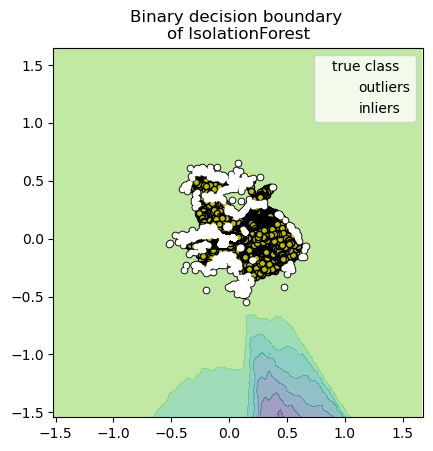

In [233]:



disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    x3[:,1:],
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(x3[:, 1], x3[:, 2], c='y', s=20, edgecolor="k")
disp.ax_.scatter(outliers[:,0],outliers[:,1], c='w', s=10)

disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend( labels=["outliers", "inliers"], title="true class")
plt.show()

In [198]:
outliers.shape

(1983, 2)

In [251]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(warm_start=True,contamination=0.1)
clf.fit(X_train)
a3=clf.predict(X_test)
a3

array([ 1, -1,  1, ...,  1,  1,  1])

In [252]:
aa =[]
for i, j in enumerate(a3):
    if j==-1:
        aa.append(i)
len(aa)

3297

C:\Users\drang\anaconda3\envs\rnn\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


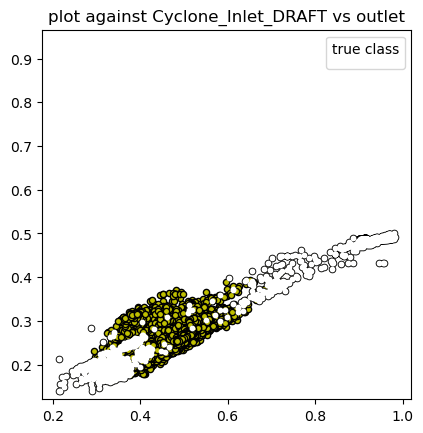

In [262]:
# outlier found by IF in PCA out =3k at contimanation = 0.01 ONTESTSET
X = dzns.to_numpy()
scatter = plt.scatter(X_test[:, 5], X_test[:, 3], c='y', s=20, edgecolor="k")
plt.scatter(X_test[aa,5],  X_test[aa, 3], c='w', s=10)
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("plot against Cyclone_Inlet_DRAFT vs outlet")
plt.show()

In [31]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
a4 = clf.predict(X_test)
a4x = clf.predict(X_train)

In [41]:
#counting outliers and thier index
aa =[]
for i, j in enumerate(a4):
    if j==-1:
        aa.append(i)
len(aa)


40449

C:\Users\drang\anaconda3\envs\rnn\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


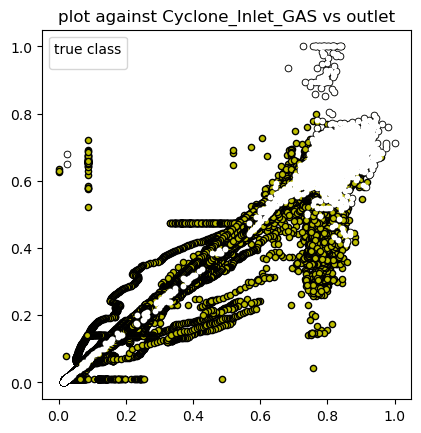

In [42]:
# outlier found by oneclassSVM out =40k at nu = 0.01 whole set+on train set=36k
X = dzns.to_numpy()
scatter = plt.scatter(X_train[:, 0], X_train[:, 4], c='y', s=20, edgecolor="k")
plt.scatter(X_train[aa,0],  X_train[aa, 4], c='w', s=10)
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("plot against Cyclone_Inlet_GAS vs outlet")
plt.show()

# pycaret

In [3]:
import pandas as pd
dfs= pd.read_csv(r"C:\Users\drang\treatedcyclonedatafinal.csv")
dfs=dfs.dropna()
dfs.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [10]:
from pycaret.anomaly import *
#dfs=dfs[300000:]
dfs

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.5,910.5,-189.5,-186.0,852.0,-145.9
1,2017-01-01 00:05:00,879.0,918.0,-184.4,-182.1,862.5,-149.8
2,2017-01-01 00:10:00,875.5,924.0,-181.2,-166.5,866.0,-145.0
3,2017-01-01 00:15:00,875.5,923.0,-179.1,-174.9,866.0,-142.9
4,2017-01-01 00:20:00,891.5,934.5,-178.4,-173.8,876.0,-143.4
...,...,...,...,...,...,...,...
376119,2020-08-07 11:55:00,899.5,920.0,-224.1,-209.8,901.0,-175.1
376120,2020-08-07 12:00:00,880.0,895.0,-228.0,-211.2,878.0,-177.0
376121,2020-08-07 12:05:00,887.0,895.5,-230.1,-214.6,885.5,-179.1
376122,2020-08-07 12:10:00,908.5,916.5,-231.5,-218.1,906.0,-182.0


In [11]:
anom = setup(data = dfs, 
             silent = False, use_gpu=True)

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.0.2. Support for newer scikit-learn versions will be added in a future release.

In [ ]:
conda install scikit-learn==0.23.2


In [14]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [15]:
anom_model = create_model(model = 'iforest', fraction = 0.01)


In [16]:
results = assign_model(anom_model) #18800 outlier for 0.05 & 3.7k 0.01
results[results['Anomaly']==1]

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Anomaly,Anomaly_Score
217292,2019-02-01 03:10:00,800.5,905.5,12.64,-5.32,785.0,18.19,1,0.002320
217293,2019-02-01 03:15:00,802.5,927.5,15.19,-3.67,787.0,18.38,1,0.002004
217381,2019-02-01 10:35:00,753.5,743.5,-56.25,-56.53,752.5,-29.66,1,0.004391
217382,2019-02-01 10:40:00,754.0,722.5,4.04,-12.13,740.5,4.75,1,0.005543
217383,2019-02-01 10:45:00,746.5,685.5,5.18,-10.60,734.0,5.83,1,0.005543
...,...,...,...,...,...,...,...,...,...
374163,2020-07-31 16:35:00,876.0,866.0,-243.40,-239.60,875.0,-191.40,1,0.006440
374164,2020-07-31 16:40:00,879.0,893.0,-242.00,-235.10,878.5,-187.40,1,0.006121
374165,2020-07-31 16:45:00,889.0,915.5,-248.00,-233.60,888.5,-193.10,1,0.005979
374166,2020-07-31 16:50:00,880.5,877.0,-252.10,-246.10,882.0,-197.50,1,0.006440


In [22]:
#a= plot_model(anom_model, plot = 'tsne')

In [23]:
#plot_model(anom_model, plot = 'umap')

In [ ]:
save_model(model = anom_model, model_name = 'iforest_model')

In [ ]:
loaded_model = load_model('iforest_model')
#loaded_model.predict(df_unseen), loaded_model.predict(df_unseen)